In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [131]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [132]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [133]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633205 entries, 0 to 1633204
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1633205 non-null  int64  
 1   kWh       1633205 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.9 MB


In [134]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1633200    0.15
1633201    0.15
1633202    0.16
1633203    0.16
1633204    0.16
Name: kWh, Length: 1633205, dtype: float64

In [135]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1633200    0.15
1633201    0.15
1633202    0.16
1633203    0.16
1633204    0.16
Name: kWh, Length: 1633205, dtype: float64

In [136]:
l=len(conso_data)-1
l

1633204

In [137]:
conso_data['sec']=conso_data['Interval']/1000


In [138]:
conso_data['Wh']=3600000/conso_data['Interval']


In [139]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [140]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633205 entries, 0 to 1633204
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1633205 non-null  int64  
 1   kWh        1633205 non-null  float64
 2   sec        1633205 non-null  float64
 3   Wh         1633205 non-null  float64
 4   cumul(ms)  1633205 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 62.3 MB


In [141]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1633200,23476,0.15,23.476,153.348100,40353141492
1633201,23450,0.15,23.450,153.518124,40353164942
1633202,22844,0.16,22.844,157.590615,40353187786
1633203,22009,0.16,22.009,163.569449,40353209795
1633204,22885,0.16,22.885,157.308281,40353232680


In [142]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

40353232680000

In [143]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 16, 20, 131030)

In [144]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [145]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [146]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [147]:
conso_data['dates']

0         2023-08-21 19:16:42.065030
1         2023-08-21 19:17:03.923030
2         2023-08-21 19:17:25.924030
3         2023-08-21 19:17:47.852030
4         2023-08-21 19:18:09.743030
                     ...            
1633200   2024-11-30 20:28:41.623030
1633201   2024-11-30 20:29:05.073030
1633202   2024-11-30 20:29:27.917030
1633203   2024-11-30 20:29:49.926030
1633204   2024-11-30 20:30:12.811030
Name: dates, Length: 1633205, dtype: datetime64[ns]

## créer les dates

In [148]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:16:42.065030,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:17:03.923030,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:17:25.924030,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:17:47.852030,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:18:09.743030,21/08/23
...,...,...,...,...,...,...,...
1633200,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24
1633201,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24
1633202,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24
1633203,22009,0.16,22.009,163.569449,40353209795,2024-11-30 20:29:49.926030,30/11/24


### save conso_data with dates

In [149]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [150]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('30/11/24', 30, 11, 2024)

In [151]:
here = now.strftime('%H:%M:%S')
here

'20:30:45'

In [152]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [153]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 1630195 to 1633204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3010 non-null   int64         
 1   kWh        3010 non-null   float64       
 2   sec        3010 non-null   float64       
 3   Wh         3010 non-null   float64       
 4   cumul(ms)  3010 non-null   int64         
 5   dates      3010 non-null   datetime64[ns]
 6   days       3010 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 188.1+ KB


In [154]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [155]:
data = list(df_grp['kWh'])
print(data)

[0.814, 3.699, 4.227, 3.678, 4.186, 4.597, 3.533, 3.422, 3.513, 3.69, 3.748, 3.819, 4.249, 3.787, 3.49, 3.632, 3.323, 3.383, 4.275, 4.009, 4.043, 3.933, 3.448, 4.441, 3.759, 3.759, 4.318, 4.71, 3.825, 3.223, 3.179, 3.986, 3.686, 3.154, 3.803, 4.121, 3.772, 3.58, 4.767, 4.198, 4.536, 3.777, 3.408, 4.308, 3.879, 3.855, 3.443, 4.079, 3.657, 3.399, 4.138, 3.384, 3.883, 3.834, 3.637, 3.76, 4.247, 3.298, 3.876, 2.989, 2.055, 2.041, 2.444, 4.087, 3.72, 4.329, 3.613, 3.929, 3.742, 3.899, 4.005, 4.106, 3.657, 3.154, 3.805, 3.506, 3.628, 3.669, 3.721, 3.246, 3.86, 3.251, 3.796, 3.613, 4.076, 3.564, 3.387, 3.816, 4.064, 4.33, 4.136, 3.998, 4.236, 3.742, 3.928, 3.86, 3.915, 3.735, 4.052, 4.346, 3.886, 3.504, 3.683, 3.667, 3.347, 3.845, 4.004, 4.099, 3.477, 4.175, 3.601, 4.06, 4.549, 3.677, 3.438, 3.579, 4.15, 3.703, 4.092, 3.98, 3.746, 3.59, 5.126, 3.703, 3.765, 4.286, 4.108, 4.692, 4.409, 3.999, 3.763, 4.307, 4.743, 4.188, 4.795, 4.313, 3.733, 4.169, 3.7, 3.659, 3.531, 3.931, 3.685, 3.784, 3.581,

In [156]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [157]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [158]:
df = conso_data
len(df)

1633205

In [159]:
period(p=2)

2023-08-22 01:22:55.868030	2023-08-22 08:27:11.488030	7h 4m 15s 	2000


In [160]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.294177
dtype: float64

In [161]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.489754
dtype: float64

In [162]:
last=df_grp.iloc[-1]['kWh']
last

3.01

In [163]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 1630195 to 1633204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3010 non-null   int64         
 1   kWh        3010 non-null   float64       
 2   sec        3010 non-null   float64       
 3   Wh         3010 non-null   float64       
 4   cumul(ms)  3010 non-null   int64         
 5   dates      3010 non-null   datetime64[ns]
 6   days       3010 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 188.1+ KB


In [164]:
# select day
day = today
#day = '16/08/24'


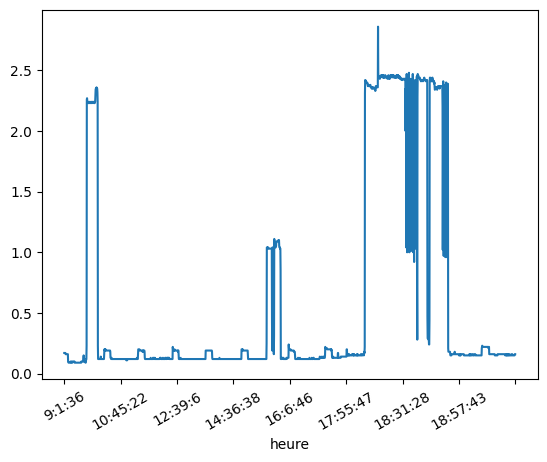

In [165]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [166]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:16:42.065030,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:17:03.923030,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:17:25.924030,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:17:47.852030,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:18:09.743030,21/08/23
...,...,...,...,...,...,...,...
1633200,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24
1633201,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24
1633202,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24
1633203,22009,0.16,22.009,163.569449,40353209795,2024-11-30 20:29:49.926030,30/11/24


In [167]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:14,18683,0.19,18.683,192.688540,40279434676,2024-11-30 00:00:14.807030,30/11/24
0:0:33,18830,0.19,18.830,191.184280,40279453506,2024-11-30 00:00:33.637030,30/11/24
0:0:52,18520,0.19,18.520,194.384449,40279472026,2024-11-30 00:00:52.157030,30/11/24
0:1:9,17541,0.20,17.541,205.233453,40279489567,2024-11-30 00:01:09.698030,30/11/24
0:1:27,17997,0.20,17.997,200.033339,40279507564,2024-11-30 00:01:27.695030,30/11/24
...,...,...,...,...,...,...,...
20:28:41,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24
20:29:5,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24
20:29:27,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24


In [168]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 19/11/24 4.568
Min : 18/11/24 3.155


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1630195,18683,0.19,18.683,192.688540,40279434676,2024-11-30 00:00:14.807030,30/11/24,0:0:14
1630196,18830,0.19,18.830,191.184280,40279453506,2024-11-30 00:00:33.637030,30/11/24,0:0:33
1630197,18520,0.19,18.520,194.384449,40279472026,2024-11-30 00:00:52.157030,30/11/24,0:0:52
1630198,17541,0.20,17.541,205.233453,40279489567,2024-11-30 00:01:09.698030,30/11/24,0:1:9
1630199,17997,0.20,17.997,200.033339,40279507564,2024-11-30 00:01:27.695030,30/11/24,0:1:27
...,...,...,...,...,...,...,...,...
1633200,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24,20:28:41
1633201,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24,20:29:5
1633202,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24,20:29:27
1633203,22009,0.16,22.009,163.569449,40353209795,2024-11-30 20:29:49.926030,30/11/24,20:29:49


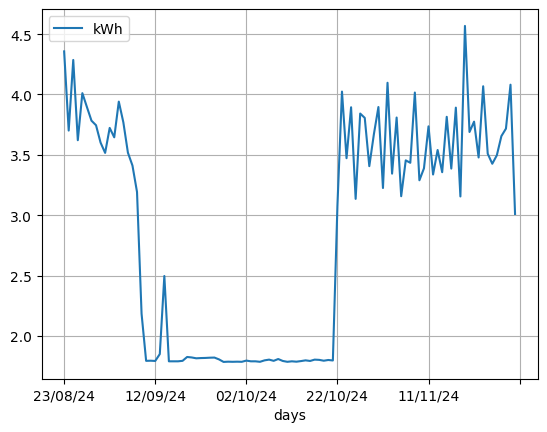

In [169]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-30 00:00:14.807030	2024-11-30 08:56:51.398030	8h 56m 36s 	1000
2024-11-30 08:56:51.398030	2024-11-30 16:02:41.396030	7h 5m 49s 	2000
2024-11-30 16:02:41.396030	2024-11-30 20:26:20.792030	4h 23m 39s 	3000
2024-11-30 20:26:20.792030	2024-11-30 20:30:12.811030	0h 3m 52s 	10
<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 1630195 to 1633204
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3010 non-null   int64         
 1   kWh        3010 non-null   float64       
 2   sec        3010 non-null   float64       
 3   Wh         3010 non-null   float64       
 4   cumul(ms)  3010 non-null   int64         
 5   dates      3010 non-null   datetime64[ns]
 6   days       3010 non-null   object        
 7   heure      3010 non-null   object        
 8   hours      3010 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 235.2+ KB


('30/11/24', <Axes: xlabel='hours'>)

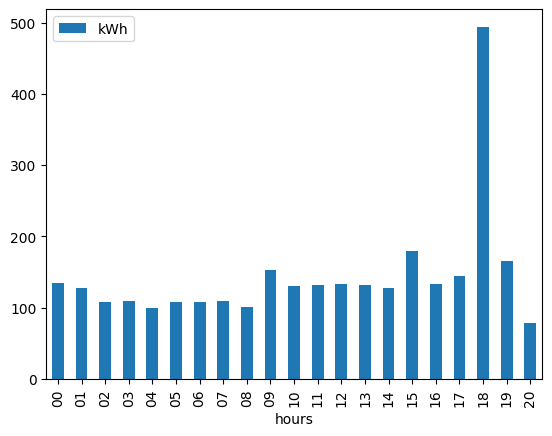

In [170]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [171]:
df_grp

,kWh
days,
21/08/23,0.814
22/08/23,3.699
23/08/23,4.227
24/08/23,3.678
25/08/23,4.186
...,...
26/11/24,3.496
27/11/24,3.655
28/11/24,3.717


In [172]:
# select number of days to display
span = 30
#df_grp.tail(span)


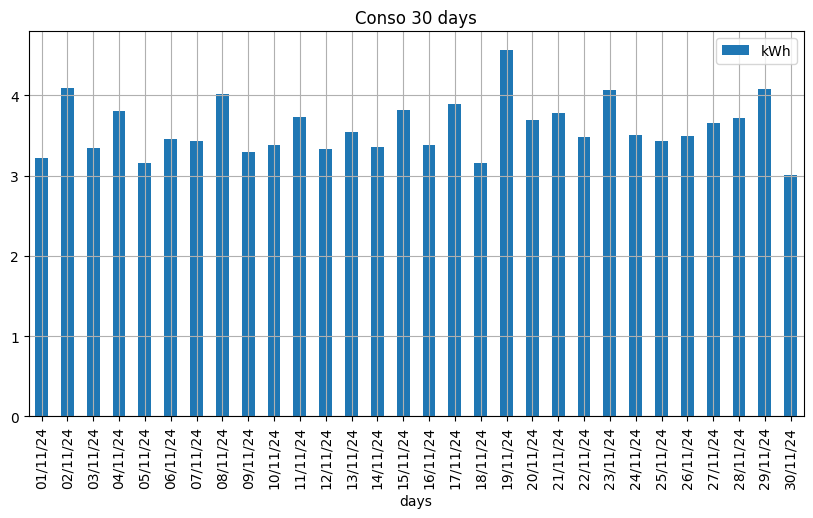

In [173]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


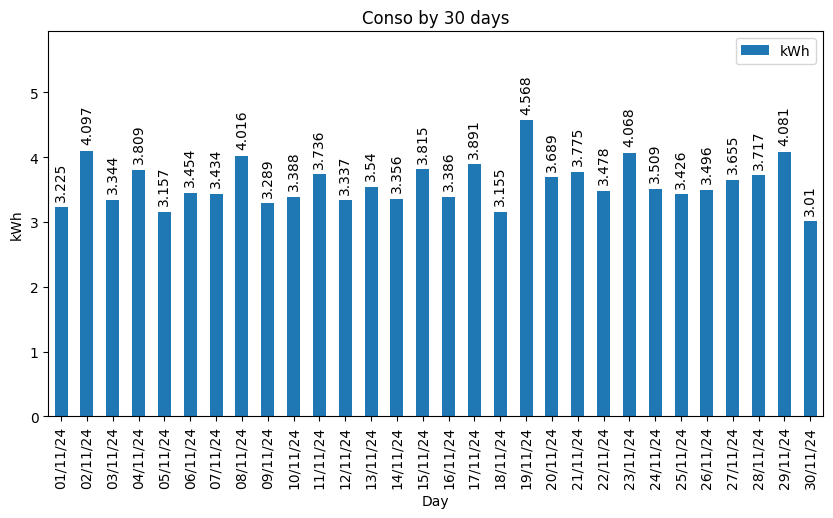

In [174]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [175]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
01/11/24    3.225
02/11/24    4.097
03/11/24    3.344
04/11/24    3.809
05/11/24    3.157
06/11/24    3.454
07/11/24    3.434
08/11/24    4.016
09/11/24    3.289
10/11/24    3.388
11/11/24    3.736
12/11/24    3.337
13/11/24    3.540
14/11/24    3.356
15/11/24    3.815
16/11/24    3.386
17/11/24    3.891
18/11/24    3.155
19/11/24    4.568
20/11/24    3.689
21/11/24    3.775
22/11/24    3.478
23/11/24    4.068
24/11/24    3.509
25/11/24    3.426
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    4.081
30/11/24    3.010
Name: kWh, dtype: float64

In [176]:
x_labels=df_grp.tail(span).index
x_labels

Index(['01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24', '06/11/24',
       '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24', '12/11/24',
       '13/11/24', '14/11/24', '15/11/24', '16/11/24', '17/11/24', '18/11/24',
       '19/11/24', '20/11/24', '21/11/24', '22/11/24', '23/11/24', '24/11/24',
       '25/11/24', '26/11/24', '27/11/24', '28/11/24', '29/11/24', '30/11/24'],
      dtype='object', name='days')

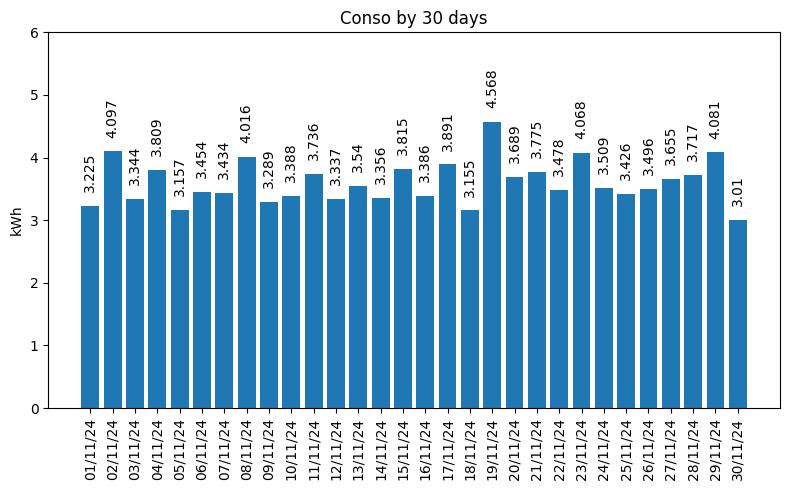

In [177]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [178]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

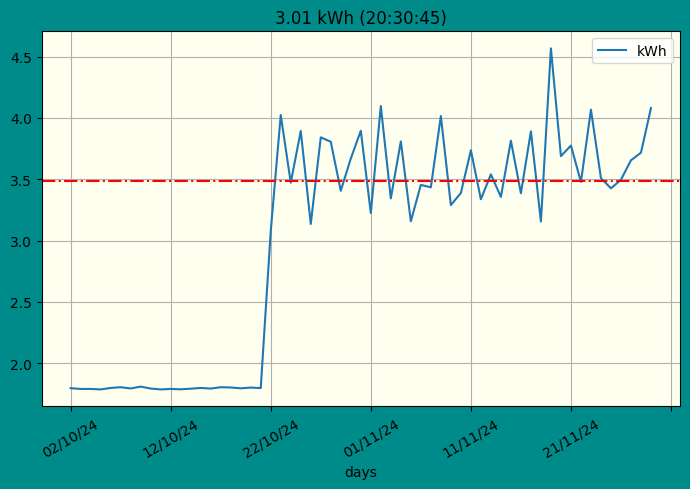

In [179]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

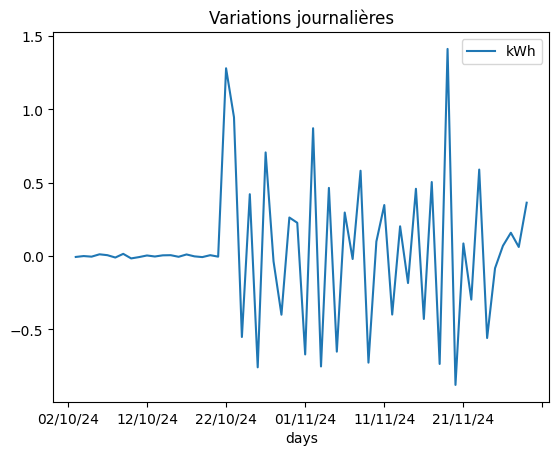

In [180]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [181]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:16:42.065030,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:17:03.923030,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:17:25.924030,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:17:47.852030,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:18:09.743030,21/08/23,19
...,...,...,...,...,...,...,...,...
1633200,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24,20
1633201,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24,20
1633202,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24,20
1633203,22009,0.16,22.009,163.569449,40353209795,2024-11-30 20:29:49.926030,30/11/24,20


In [182]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [183]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [184]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [185]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,814
22/08/23,3699
23/08/23,4227
24/08/23,3678
25/08/23,4186
...,...
26/11/24,3496
27/11/24,3655
28/11/24,3717


In [187]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:16:42.065030,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:17:03.923030,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:17:25.924030,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:17:47.852030,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:18:09.743030,21/08/23,19
...,...,...,...,...,...,...,...,...
1633200,23476,0.15,23.476,153.348100,40353141492,2024-11-30 20:28:41.623030,30/11/24,20
1633201,23450,0.15,23.450,153.518124,40353164942,2024-11-30 20:29:05.073030,30/11/24,20
1633202,22844,0.16,22.844,157.590615,40353187786,2024-11-30 20:29:27.917030,30/11/24,20
1633203,22009,0.16,22.009,163.569449,40353209795,2024-11-30 20:29:49.926030,30/11/24,20


In [188]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 19    0        21/08/23    19  0.16
               1        21/08/23    19  0.16
               2        21/08/23    19  0.16
               3        21/08/23    19  0.16
               4        21/08/23    19  0.16
...                          ...   ...   ...
30/11/24 20    1633200  30/11/24    20  0.15
               1633201  30/11/24    20  0.15
               1633202  30/11/24    20  0.16
               1633203  30/11/24    20  0.16
               1633204  30/11/24    20  0.16

[1633205 rows x 3 columns]

In [189]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [190]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/2

In [191]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,814,814
22/08/23,3699,3699
23/08/23,4227,4227
24/08/23,3678,3678
25/08/23,4186,4186
...,...,...
26/11/24,3496,3496
27/11/24,3655,3655
28/11/24,3717,3717


In [192]:
grp_by_day['kWh'].cumsum()

days
21/08/23        814
22/08/23       4513
23/08/23       8740
24/08/23      12418
25/08/23      16604
             ...   
26/11/24    1618742
27/11/24    1622397
28/11/24    1626114
29/11/24    1630195
30/11/24    1633205
Name: kWh, Length: 468, dtype: int64

In [193]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 19     134
         20     281
         21     139
         22     129
         23     131
...             ...
30/11/24 16     133
         17     145
         18     494
         19     165
         20      79

[11210 rows x 1 columns]

In [194]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  19           134
          20           415
          21           554
          22           683
          23           814
                    ...   
30/11/24  16       1632322
          17       1632467
          18       1632961
          19       1633126
          20       1633205
Name: kWh, Length: 11210, dtype: int64

In [195]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 19     134     134    NaN
         20     281     415  147.0
         21     139     554 -142.0
         22     129     683  -10.0
         23     131     814    2.0
...             ...     ...    ...
30/11/24 16     133    2127  -46.0
         17     145    2272   12.0
         18     494    2766  349.0
         19     165    2931 -329.0
         20      79    3010  -86.0

[11210 rows x 3 columns]

In [196]:
today, grp_by_dayhours.loc[today]

('30/11/24',
        kWh  cumsum   diff
 hours                    
 00     135     135    NaN
 01     127     262   -8.0
 02     108     370  -19.0
 03     110     480    2.0
 04     100     580  -10.0
 05     108     688    8.0
 06     108     796    0.0
 07     109     905    1.0
 08     101    1006   -8.0
 09     153    1159   52.0
 10     131    1290  -22.0
 11     132    1422    1.0
 12     133    1555    1.0
 13     132    1687   -1.0
 14     128    1815   -4.0
 15     179    1994   51.0
 16     133    2127  -46.0
 17     145    2272   12.0
 18     494    2766  349.0
 19     165    2931 -329.0
 20      79    3010  -86.0)

Text(0.5, 1.0, 'Cumul journalier')

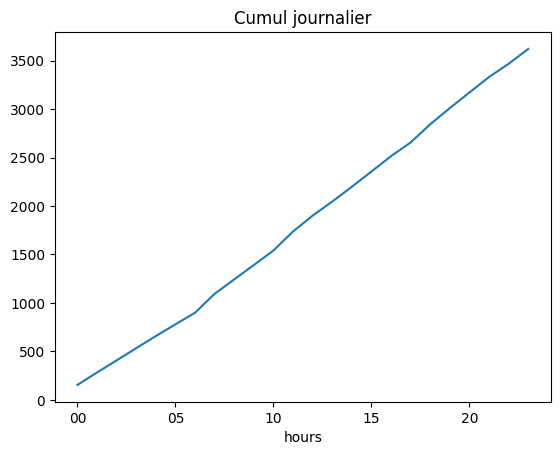

In [197]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

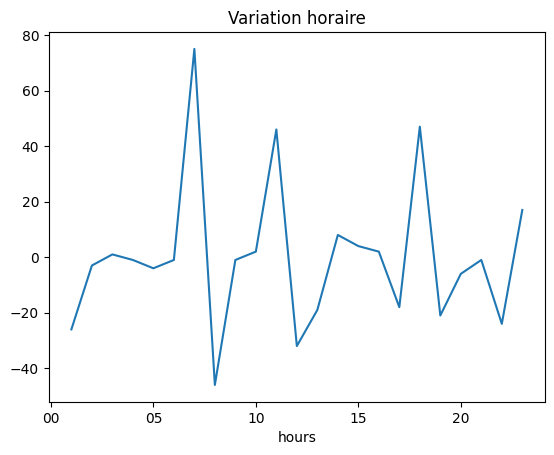

In [198]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [199]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

468

In [200]:
df_grp.tail(n)['kWh'].describe()


count    468.000000
mean       3.489754
std        0.698911
min        0.814000
25%        3.346250
50%        3.621000
75%        3.876000
max        5.126000
Name: kWh, dtype: float64

In [201]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '468 days')

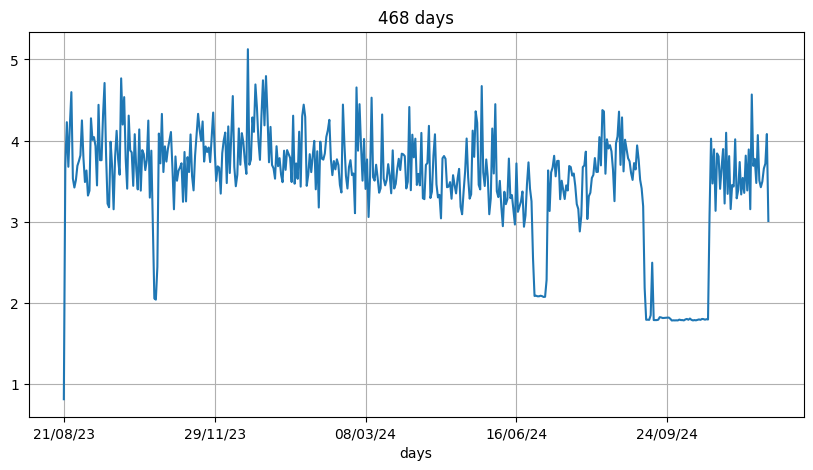

In [202]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

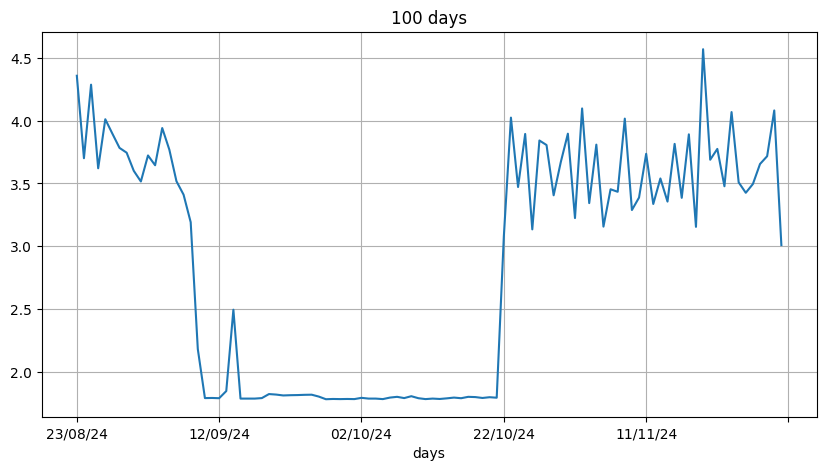

In [203]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [204]:
df_grp['kWh']

days
21/08/23    0.814
22/08/23    3.699
23/08/23    4.227
24/08/23    3.678
25/08/23    4.186
            ...  
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    4.081
30/11/24    3.010
Name: kWh, Length: 468, dtype: float64

In [205]:
df_grp.describe()

,kWh
count,468.000000
mean,3.489754
std,0.698911
min,0.814000
25%,3.346250
50%,3.621000
75%,3.876000
max,5.126000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

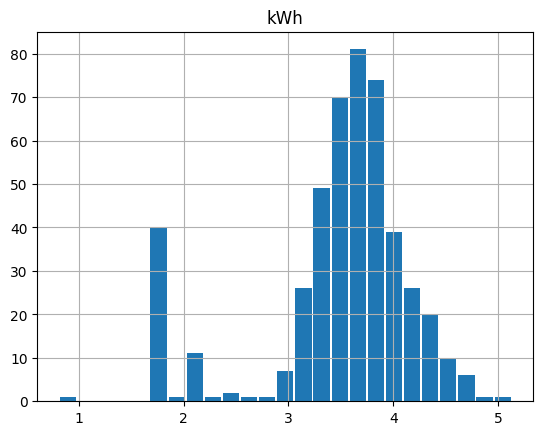

In [206]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [207]:
df_grp.tail(span)['kWh']

days
23/08/24    4.357
24/08/24    3.701
25/08/24    4.286
26/08/24    3.621
27/08/24    4.011
            ...  
26/11/24    3.496
27/11/24    3.655
28/11/24    3.717
29/11/24    4.081
30/11/24    3.010
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [208]:
day

'30/11/24'

In [209]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,135,135,NaN
01,127,262,-8.0
02,108,370,-19.0
03,110,480,2.0
04,100,580,-10.0
05,108,688,8.0
06,108,796,0.0
07,109,905,1.0
08,101,1006,-8.0


In [210]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


21

In [211]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 22)

In [212]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [213]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [214]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
Name: days, dtype: float64

In [215]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [216]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 00 to 20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     21 non-null     int64  
 1   cumsum  21 non-null     int64  
 2   diff    20 non-null     float64
 3   days    21 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 840.0+ bytes


In [217]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
20    21.0
Name: days, dtype: float64

In [218]:
day

'30/11/24'

In [219]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,135,135,NaN,1.0
01,127,262,-8.0,2.0
02,108,370,-19.0,3.0
03,110,480,2.0,4.0
04,100,580,-10.0,5.0
05,108,688,8.0,6.0
06,108,796,0.0,7.0
07,109,905,1.0,8.0
08,101,1006,-8.0,9.0


Text(0.5, 1.0, '30/11/24')

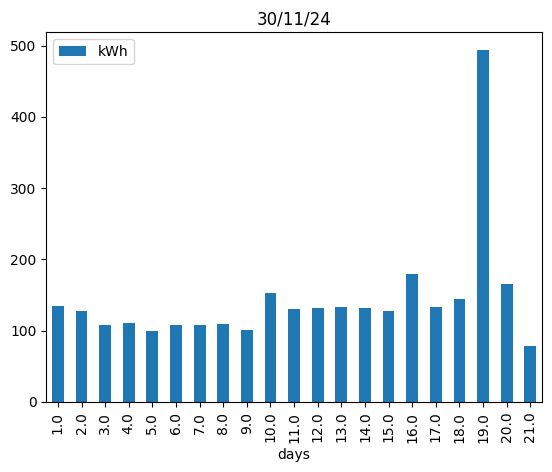

In [220]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [221]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object', name='hours')

# Conso du jour


In [222]:
groupedbyhour.count()

,kWh
hours,
00,135
01,127
02,108
03,110
04,100
05,108
06,108
07,109
08,101


In [223]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    166
01    153
02    169
03    158
04    155
05    142
06    115
07    130
08    130
09    115
10    130
11    115
12    131
13    205
14    139
15    157
16    986
17    206
18    279
19    301
20    312
21    322
22    221
23    189
Name: kWh, dtype: int64

In [224]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

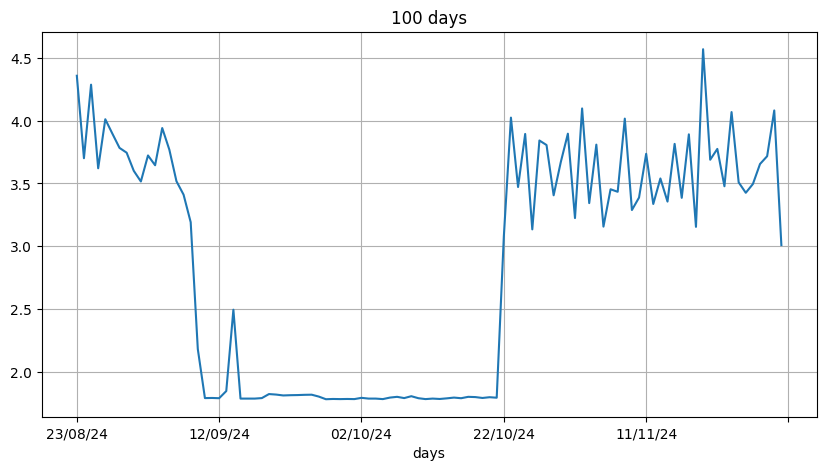

In [225]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [226]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

79.60674953460693


# Today

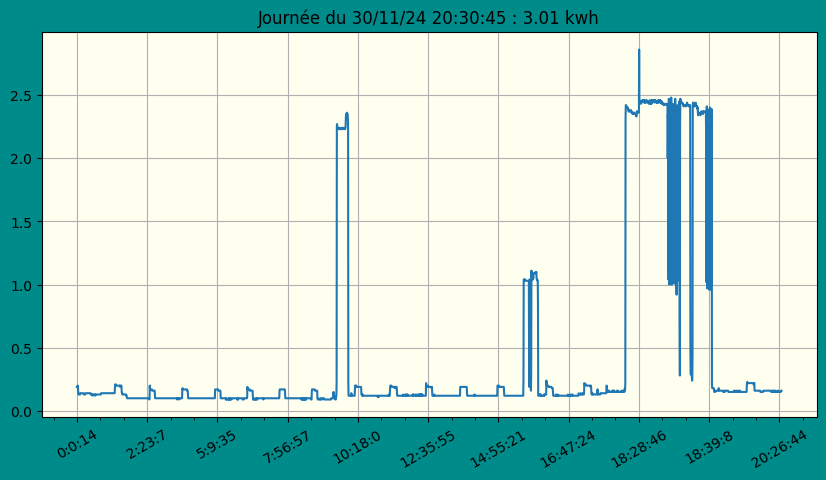

In [227]:
show(today,bgcolor='ivory')

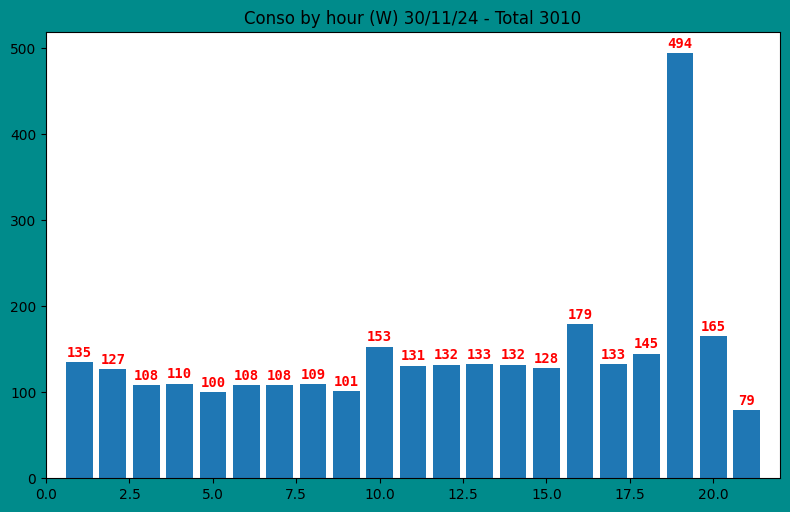

In [228]:
conso_by_hour(today)

In [229]:
day = '21/11/24'

('21/11/24', None)

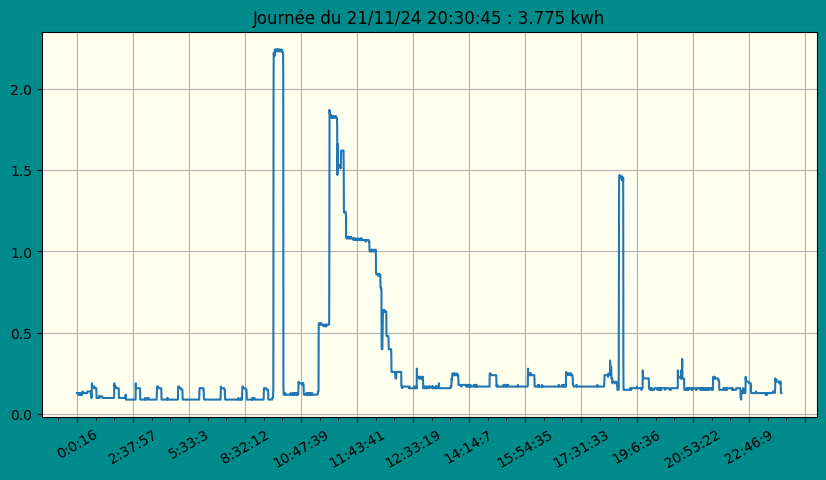

In [230]:
day, show(day,bgcolor='ivory')

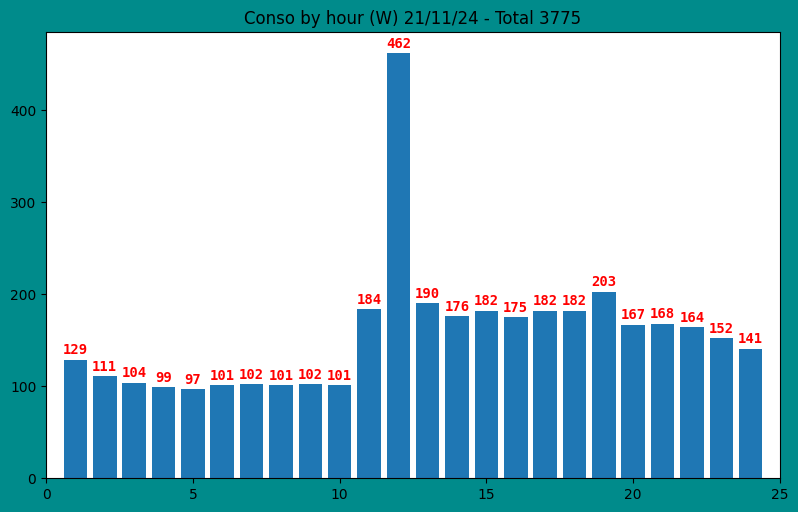

In [231]:
conso_by_hour(day)

('21/12/23', None)

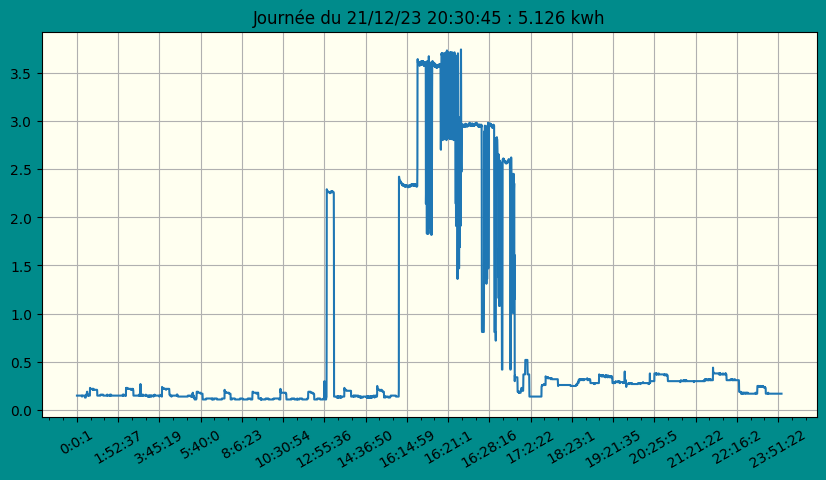

In [232]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

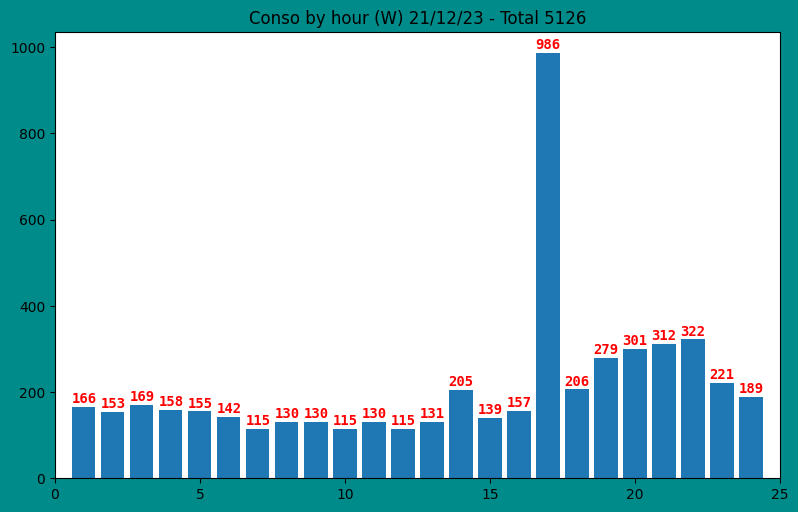

In [233]:
conso_by_hour(day)

In [234]:
sum(data)

5126

In [235]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,135,135,NaN,1.0
01,127,262,-8.0,2.0
02,108,370,-19.0,3.0
03,110,480,2.0,4.0
04,100,580,-10.0,5.0
05,108,688,8.0,6.0
06,108,796,0.0,7.0
07,109,905,1.0,8.0
08,101,1006,-8.0,9.0


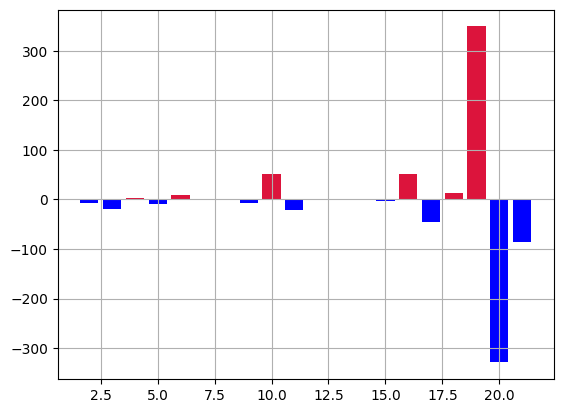

In [236]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [237]:
data

hours
00    166
01    153
02    169
03    158
04    155
05    142
06    115
07    130
08    130
09    115
10    130
11    115
12    131
13    205
14    139
15    157
16    986
17    206
18    279
19    301
20    312
21    322
22    221
23    189
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

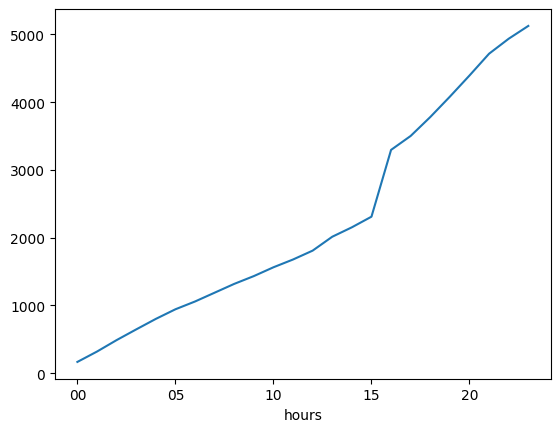

In [238]:
data.cumsum().plot()


<Axes: xlabel='hours'>

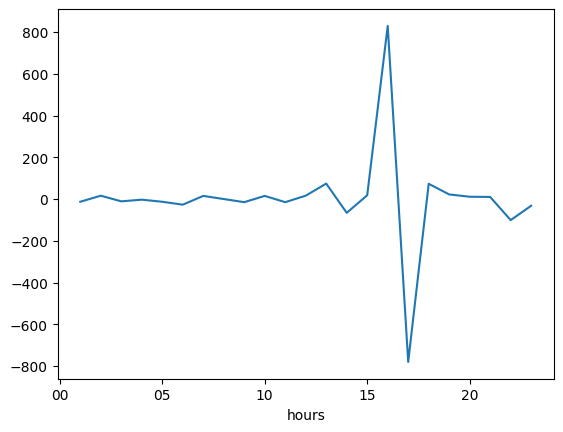

In [239]:
# evolution par heure
data.diff().plot()

In [240]:
data.diff().describe()

count     23.000000
mean       1.000000
std      245.471902
min     -780.000000
25%      -15.000000
50%        0.000000
75%       16.000000
max      829.000000
Name: kWh, dtype: float64

<Axes: >

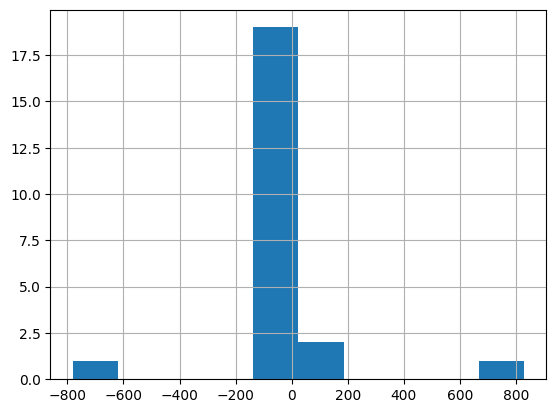

In [241]:
data.diff().hist()

# Test sauvegarde

In [242]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [243]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [244]:
#conso_byhour(day)

In [245]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


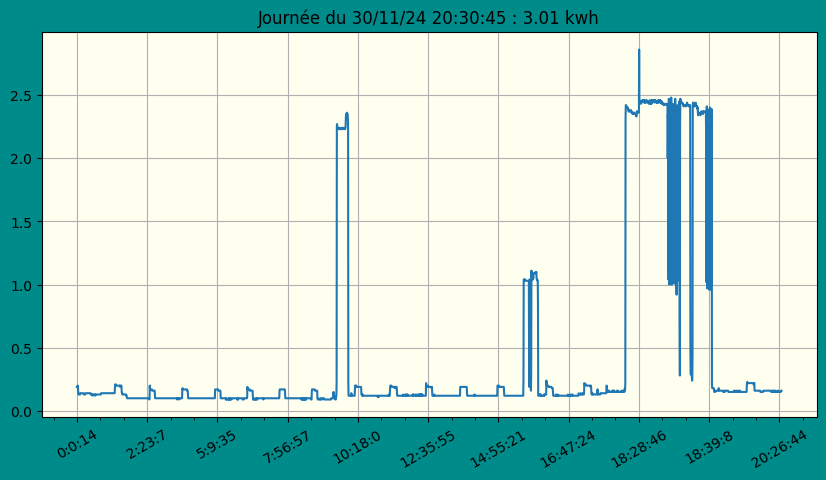

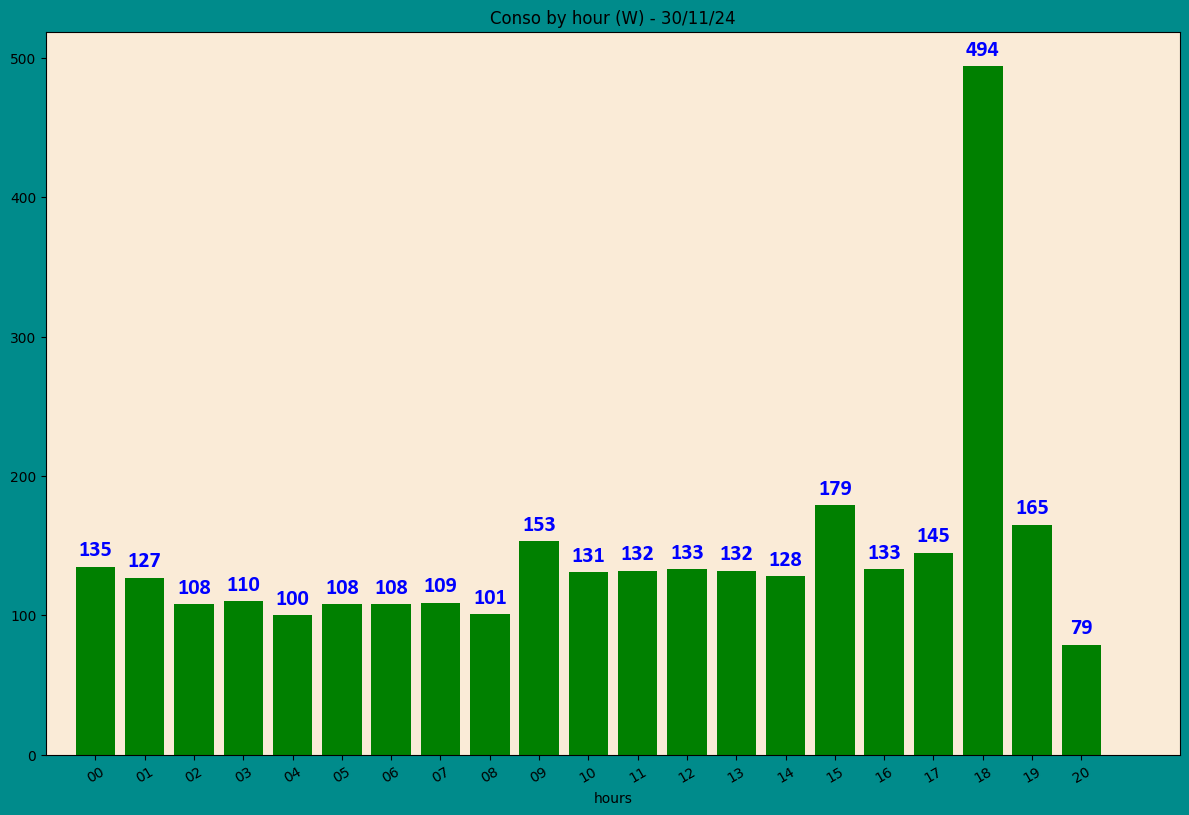

In [246]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [247]:
month.describe()


count    30.000000
mean      3.626233
std       0.329896
min       3.155000
25%       3.386500
50%       3.524500
75%       3.813500
max       4.568000
Name: kWh, dtype: float64

<Axes: >

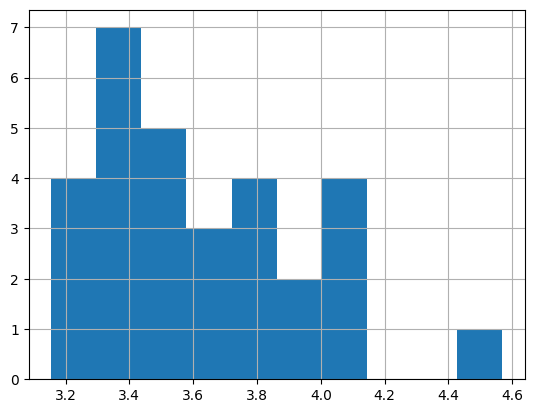

In [248]:
month.hist()

<Axes: xlabel='days'>

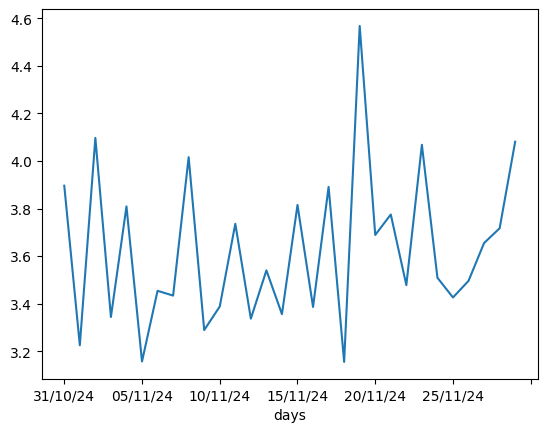

In [249]:
month.plot()

In [250]:
# date with max conso in 1 month
month.idxmax()

'19/11/24'

In [251]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'19/11/24'

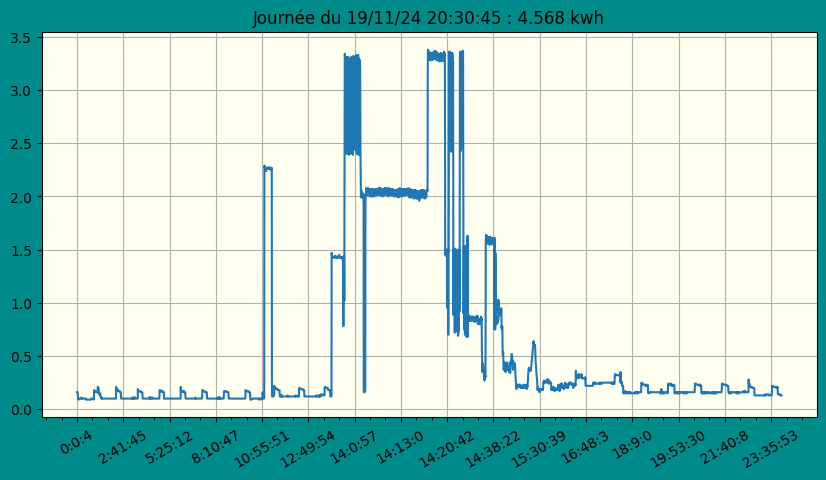

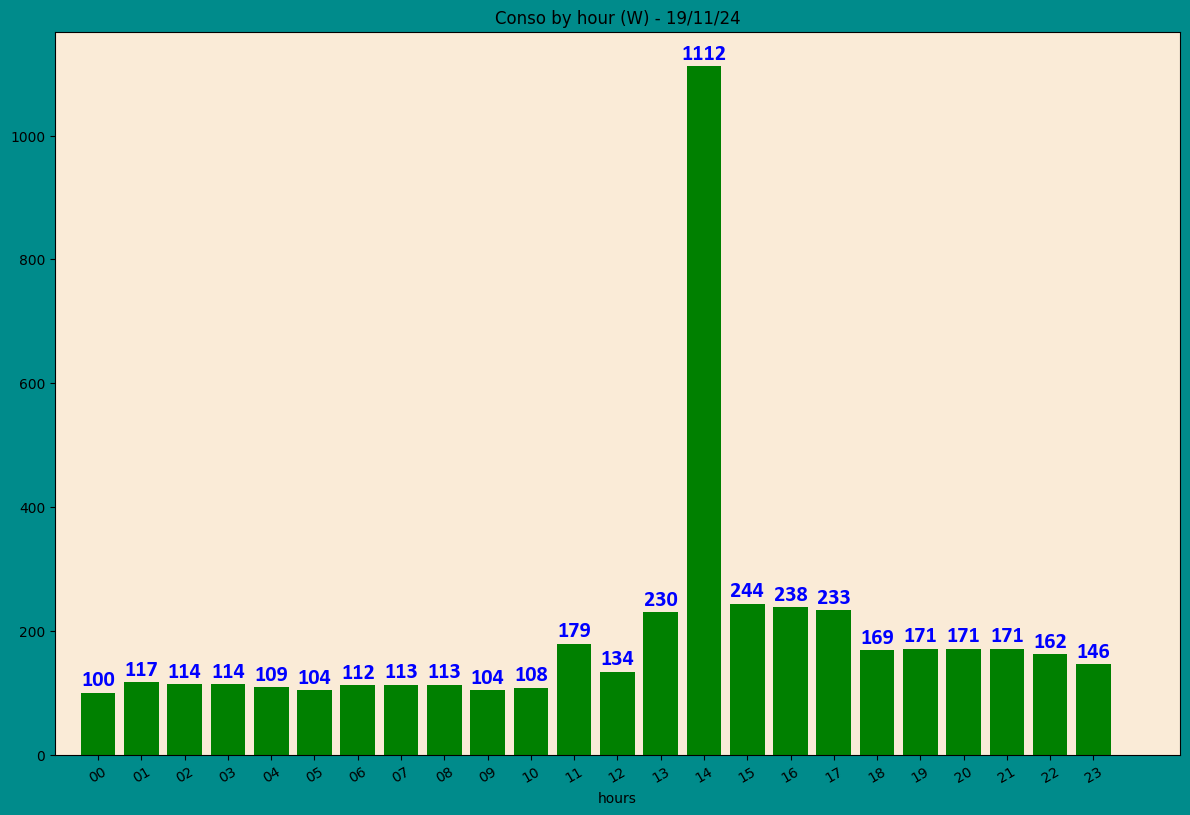

In [252]:
show(day,pltcolor='darkcyan')s
conso_byhour(day)

In [253]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 19     134     134    NaN   NaN
         20     281     415  147.0   NaN
         21     139     554 -142.0   NaN
         22     129     683  -10.0   NaN
         23     131     814    2.0   NaN
...             ...     ...    ...   ...
30/11/24 16     133    2127  -46.0  17.0
         17     145    2272   12.0  18.0
         18     494    2766  349.0  19.0
         19     165    2931 -329.0  20.0
         20      79    3010  -86.0  21.0

[11210 rows x 4 columns]

In [254]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,100,100,NaN,NaN
01,117,217,17.0,NaN
02,114,331,-3.0,NaN
03,114,445,0.0,NaN
04,109,554,-5.0,NaN
05,104,658,-5.0,NaN
06,112,770,8.0,NaN
07,113,883,1.0,NaN
08,113,996,0.0,NaN


In [255]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

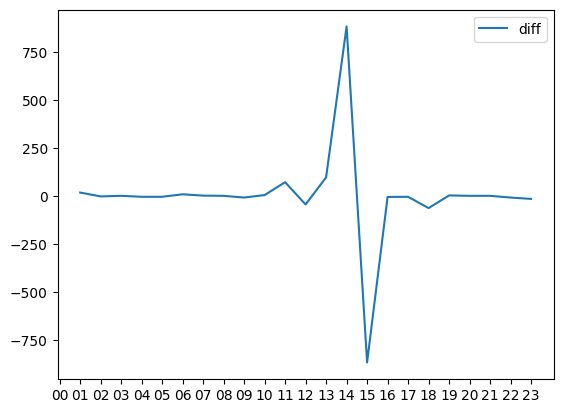

In [256]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

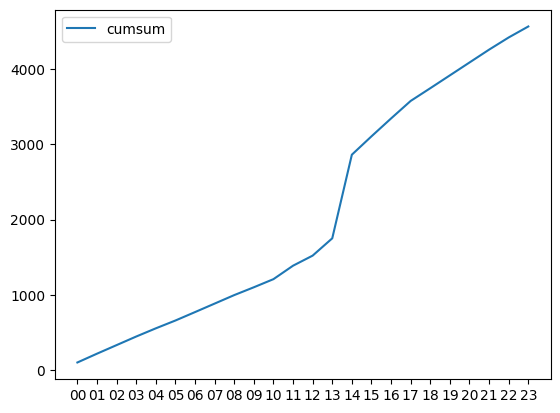

In [257]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [258]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB